In [1]:
using DCAUtils, JLD2, Statistics, Plots, LaTeXStrings

In [2]:
function consensus(Z::Array{Int8,2})
    L = size(Z,1)
    f1 = reshape(compute_weighted_frequencies(Z,22,0.)[1],(21,L))
    return [argmax(f1[:,i]) for i in 1:L]
end

function consensus(Zs::Array{Array{Int8,2},1})
    L = size(Zs[1],1)
    N = length(Zs)
    return hcat([consensus(Zs[i]) for i in 1:N]...)
end

consensus (generic function with 2 methods)

In [3]:
@load "../../data_Genie/3_seqs_sim.jld2";
@load "../../data_Genie/cie_dbd.jld2";
@load "../../data_Genie/3_seqs_sim_local_profile.jld2";
@load "../../data_Genie/3_seqs_sim_profile.jld2";

In [4]:
points = [50*i for i in 1:7]; L = 76;
s1 = [read_fasta_alignment("../../data_Genie/seq1_alignments/seq1_$(points[i]).fa",0.9) 
    for i in 1:7];
s2 = [read_fasta_alignment("../../data_Genie/seq2_alignments/seq2_$(points[i]).fa",0.9) 
    for i in 1:7];
s3 = [read_fasta_alignment("../../data_Genie/seq3_alignments/seq3_$(points[i]).fa",0.9) 
    for i in 1:7];
s2_p = [read_fasta_alignment("../../data_Genie/prof_seq2_alignments/seq2_$(points[i]).fa",0.9) 
    for i in 1:7]
s2_lp = [read_fasta_alignment("../../data_Genie/local_prof_seq2_alignments/seq2_$(points[i]).fa",0.9) 
    for i in 1:7]
c1 = consensus(s1);
c2 = consensus(s2);
c3 = consensus(s3);
c2_p = consensus(s2_p);
c2_lp = consensus(s2_lp);

θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200
θ = 0.0 threshold = 0.0
M = 200 N = 76 Meff = 200


In [5]:
d1 = mean(c1 .!= start_msa[:,1], dims = 1)[1,:];
d2 = mean(c2 .!= start_msa[:,2], dims = 1)[1,:];
d3 = mean(c3 .!= start_msa[:,3], dims = 1)[1,:];
d2_p = mean(c2_p .!= start_msa[:,2], dims = 1)[1,:];
d2_lp = mean(c2_lp .!= start_msa[:,2], dims = 1)[1,:];

In [6]:
real_sweeps = res_all[1].steps[points] ./ 76;
sweeps = res_all[1].steps ./ 76;
score1 = mean(entr1' ./ cie, dims = 1)[1,:]; 
score2 = mean(entr2' ./ cie, dims = 1)[1,:]; 
score3 = mean(entr3' ./ cie, dims = 1)[1,:]; 
score2_p = mean(entr2_p' ./ cie, dims = 1)[1,:]; 
score2_lp = mean(entr2_lp' ./ cie, dims = 1)[1,:]; 

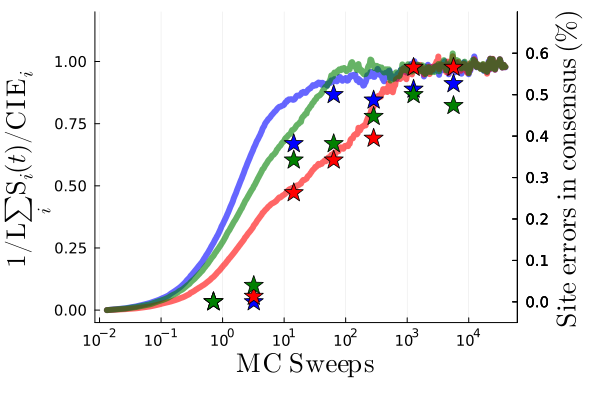

In [7]:
transp = 0.6

plot(sweeps, score1, color = :blue, alpha = transp, xaxis = :log, linewidth = 6,
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,1.2))
plot!(xlabel=L"\textrm{MC\ Sweeps}")  
plot!(ylabel=L" \textrm{1/L} \sum_i \textrm{S}_i (t) / \textrm{CIE}_i ")   

plot!(sweeps, score2, color = :red, alpha = transp, xaxis = :log, linewidth = 6,
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,1.2))

plot!(sweeps, score3, color = :green, alpha = transp, xaxis = :log, linewidth = 6,
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,1.2))

scatter!(twinx(),real_sweeps, d1, 
    color = :blue, xaxis = :log, 
xticks = 10.0 .^collect(-2:6), ylabel=L"\textrm{Site \ errors \ in \ consensus \ (\%)}", marker = :star,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18, markersize = 10,
    ylims=(-0.05,0.7))  

scatter!(twinx(),real_sweeps, d2, 
    color = :red, xaxis = :log, marker = :star, markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
    ylims=(-0.05,0.7))  

scatter!(twinx(),real_sweeps, d3, 
    color = :green, xaxis = :log,marker = :star,markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
    ylims=(-0.05,0.7))  

plot!(bottom_margin = 6Plots.mm)
plot!(right_margin = 5Plots.mm)
plot!(left_margin = 3Plots.mm)
plot!(legend=:none)
plot!(size=(600,400))
#savefig("../../figures/suppl_saverio/3_seqs_entropy_vs_consensus.pdf")

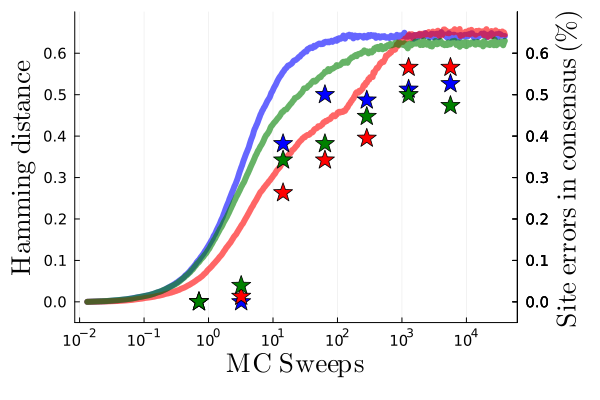

In [8]:
transp = 0.6

plot(sweeps, dd1 ./ L, color = :blue, alpha = transp, xaxis = :log, linewidth = 6,
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,0.7))
plot!(xlabel=L"\textrm{MC\ Sweeps}")  
plot!(ylabel=L"\textrm{Hamming \ distance}")   

plot!(sweeps, dd2 ./ L, color = :red, alpha = transp, xaxis = :log, linewidth = 6,
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,0.7))

plot!(sweeps, dd3 ./ L, color = :green, alpha = transp, xaxis = :log, linewidth = 6,
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,0.7))

scatter!(twinx(),sweeps[points], d1, 
    color = :blue, xaxis = :log, 
xticks = 10.0 .^collect(-2:6), ylabel=L"\textrm{Site \ errors \ in \ consensus \ (\%)}", marker = :star,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18, markersize = 10,
    ylims=(-0.05,0.7))  

scatter!(twinx(),sweeps[points], d2, 
    color = :red, xaxis = :log, marker = :star, markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
    ylims=(-0.05,0.7))  

scatter!(twinx(),sweeps[points], d3, 
    color = :green, xaxis = :log,marker = :star,markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
    ylims=(-0.05,0.7))  

plot!(bottom_margin = 6Plots.mm)
plot!(right_margin = 5Plots.mm)
plot!(left_margin = 3Plots.mm)
plot!(legend=:none)
plot!(size=(600,400))
#savefig("../../figures/suppl_saverio/3_seqs_hamming_vs_consensus.pdf")

In [58]:
transp = 0.6

plot(sweeps, score2_p , color = :red, alpha = transp, xaxis = :log, linewidth = 6,label = L"\textrm{Profile}",
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,1.2))
plot!(xlabel=L"\textrm{MC\ Sweeps}")
plot!(ylabel=L" \textrm{1/L} \sum_i \textrm{S}_i (t) / \textrm{CIE}_i ")   


plot!(sweeps, score2 , color = :darkred, alpha = 1.0, xaxis = :log, linewidth = 6, label = L"\textrm{Potts}",
    linestyle = :dash, xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,1.2))

plot!(sweeps, score2_lp , color = :orange, alpha = 1.0, xaxis = :log, linewidth = 6, label = L"\textrm{Local \ Profile}",
    linestyle = :dot, xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,1.2))

scatter!(twinx(),sweeps[points], d2_p, 
    color = :red, xaxis = :log, label = "",
xticks = 10.0 .^collect(-2:6), ylabel=L"\textrm{Site \ errors \ in \ consensus \ (\%)}", marker = :star,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18, markersize = 10,
    ylims=(-0.05,0.7))  

scatter!(twinx(),sweeps[points], d2, 
    color = :darkred, xaxis = :log, marker = :star, markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,label = "",
    ylims=(-0.05,0.7))  

scatter!(twinx(),sweeps[points], d2_lp, 
    color = :orange, xaxis = :log, marker = :star, markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,label = "",
    ylims=(-0.05,0.7))  

plot!(bottom_margin = 6Plots.mm)
plot!(right_margin = 5Plots.mm)
plot!(left_margin = 3Plots.mm)
plot!(legend=:topleft)
plot!(size=(600,400))
savefig("../../figures/suppl_saverio/prof_potts_entropy_vs_consensus.pdf")

"/home/disat/ldibari/figures/suppl_saverio/prof_potts_entropy_vs_consensus.pdf"

In [59]:
transp = 0.6

plot(sweeps, dd2_p ./L, color = :red, alpha = transp, xaxis = :log, linewidth = 6, label = L"\textrm{Profile}",
    xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,0.8))
plot!(xlabel=L"\textrm{MC\ Sweeps}")  
plot!(ylabel=L"\textrm{Hamming \ distance}")   


plot!(sweeps, dd2 ./L , color = :darkred, alpha = 1.0, xaxis = :log, linewidth = 6, label = L"\textrm{Potts}",
    linestyle = :dash, xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,0.8))

plot!(sweeps, dd2_lp ./L , color = :orange, alpha = 1.0, xaxis = :log, linewidth = 6, label = L"\textrm{Local \ Profile}",
    linestyle = :dot, xticks = 10.0 .^collect(-2:6), xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
ylims=(-0.05,0.8))


scatter!(twinx(),sweeps[points], d2_p, 
    color = :red, xaxis = :log, label = "",
xticks = 10.0 .^collect(-2:6), ylabel=L"\textrm{Site \ errors \ in \ consensus \ (\%)}", marker = :star,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18, markersize = 10,
    ylims=(-0.05,0.7))  

scatter!(twinx(),sweeps[points], d2, 
    color = :darkred, xaxis = :log, marker = :star, markersize = 10,label = "",
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,
    ylims=(-0.05,0.7))  

scatter!(twinx(),sweeps[points], d2_lp, 
    color = :orange, xaxis = :log, marker = :star, markersize = 10,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18,label = "",
    ylims=(-0.05,0.7))  

plot!(bottom_margin = 6Plots.mm)
plot!(right_margin = 5Plots.mm)
plot!(left_margin = 3Plots.mm)
plot!(legend=:topleft)
plot!(size=(600,400))

savefig("../../figures/suppl_saverio/prof_potts_hamming_vs_consensus.pdf")


"/home/disat/ldibari/figures/suppl_saverio/prof_potts_hamming_vs_consensus.pdf"

In [10]:
Gencont_dep

76×200 Matrix{Int8}:
  2   2   2   2   2   2   2   2   2  …   2   2   2   2   2   2   2   2   2
  1   1   1   1   1   1   1   1   1      1   1   1  18   1   1   1   1   1
 18  18  18  18   8  18  18  18  18     18  18  18  18  18  18  18  18  18
  2   2   2   2   2   2   2   2   2      2   2   2   2   2   2   2   2   2
  6   6   6   6   6   6   6   6   6      6   6   6   6   6   6   6   4   6
  6   6   6   6   6   6   6  17   6  …   6   6   6   6  15   8   6   6   6
  9   9   9   9   9   9   9   9   9      9   9   9   9   9   9   9   9   9
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   1   1   1
 17  17  17  17  17  17  17  17   8      5  17  17  17  17  17  17  17  17
  6   6   6   6   6   6   6   6   6      6   6   6   6   6   6   6   6   6
  5   5   5   5   5   5   5   5   5  …   5   5  20   5   5   5   8   5   5
 12  12  12  12  12  12  12  12  12     12  12  12  12  12  12  12  12  12
 20  20  20  20  20  20  20  20  20     20  20  20  20  20  20  20  20  20
  ⋮ 